# Imports

In [ ]:
import numpy as np
import json
import os, random, shutil
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
import cv2
from google.colab import drive
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
import cv2
import time
from skimage.morphology import disk
import statistics
from google.colab.patches import cv2_imshow
from PIL import Image  
from IPython.display import display # to display images
import matplotlib.image as mpimg
from IPython.display import display
from skimage.measure import label, regionprops, regionprops_table
from skimage import data, exposure
from skimage.color import rgb2gray
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage.color import rgb2hsv # image processing algorithms
import matplotlib.pyplot as plt
import math
from skimage import data, img_as_float
from skimage.segmentation import chan_vese
import sys
from skimage.filters import threshold_otsu, threshold_local,median
from skimage import data, img_as_float, morphology
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)
np.set_printoptions(threshold=sys.maxsize)
import skimage.io as sk
from contextlib import suppress
import os, random, shutil
from skimage import filters
import imageio as iio
from skimage.filters import threshold_otsu, threshold_local
from skimage.filters import threshold_minimum
from skimage.filters import threshold_multiotsu
import numpy as np
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage import measure
from skimage.segmentation import random_walker
import matplotlib.pyplot as plt
from scipy import ndimage

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max
import time

from skimage import exposure

from sklearn import metrics

# Plots

In [ ]:

def histograms(greyimage,imgoriginal):

  fig, ax = plt.subplots(2, 2, figsize=(9, 9))
  ax[0, 0].set_title('Grey-scaled', fontsize=12)
  ax[0,0].imshow(greyimage, cmap=plt.cm.gray)
  ax[1, 0].set_title('Grey-scaled Histogram', fontsize=12)
  ax[1, 0].set_xlabel('Grey value - Normalised',fontsize=12)
  ax[1, 0].set_ylabel('Frequency', fontsize=12)
  ax[1,0].hist(greyimage.ravel(), bins=100)
  ax[1,0].set_xlim(left=0, right=1)
  ax[0, 0].axis('off')
  ax[1,0].set_xlim(left=0, right=1)
  ax[0,1].imshow(imgoriginal, cmap=plt.cm.gray)
  ax[0, 1].axis('off')
  ax[1,1].hist(imgoriginal.ravel(), bins=100)
  ax[1,1].set_xlim(left=0, right=1)
  ax[1, 1].set_xlabel('H value - Normalised',fontsize=12)
  ax[1, 1].set_ylabel('Frequency',fontsize=12)
  ax[0, 1].set_title('HSV Image - Hue value',fontsize=12)
  ax[1, 1].set_title('Hue value histogram',fontsize=12)


def binary_clearup(image,binary_global,mask1):
  
  fig2, ax2 = plt.subplots(1, 4, figsize=(20, 7))
  ax2[0].imshow(image)
  ax2[0].set_title('Original Image')
  ax2[0].axis('off')
  ax2[1].imshow(binary_global, cmap=plt.cm.gray)
  ax2[1].set_title('Resulting Binary Image')
  ax2[1].axis('off')
  ax2[2].imshow(mask1, cmap=plt.cm.gray)
  ax2[2].set_title('Holes and Small Objects removed')
  ax2[2].axis('off')

def thresholds(imgoriginal,imgmedian,global_thresh):

  fig3, ax3 = plt.subplots(2, 2, figsize=(14, 7))
  ax3[0, 0].set_title('HSV Image - H')
  ax3[0, 0].imshow(imgoriginal, cmap=plt.cm.gray)
  ax3[1,0].hist(imgoriginal.ravel(), bins=100)
  ax3[1, 0].set_title('H value Histogram')
  ax3[1,0].set_xlim(left=0, right=1)
  ax3[0, 0].axis('off')
  ax3[0, 1].set_title('Median Filter')
  ax3[0,1].imshow(imgmedian, cmap=plt.cm.gray)
  ax3[0, 1].axis('off')
  ax3[1,1].set_xlim(left=0, right=1)
  ax3[1, 1].set_title('Median Filter Histogram')
  ax3[1,1].hist(imgmedian.ravel(), bins=100)
  ax3[1, 1].axvline(0.04, linewidth=1, color='r',)
  ax3[1, 1].axvline(0.9, color='r',linewidth=1,)
  ax3[1,1].set_xlim(left=0, right=1)
  if global_thresh != 0:
    ax3[1, 1].axvline(global_thresh, linewidth=1,color='g')
    ax3[1,1].set_xlim(left=0.1, right=0.4)
  

def watershedseg(image,mask1,labels_ws,path):

  plt.figure(figsize=(12, 6))
  plt.subplot(141)
  plt.imshow(image)
  plt.title('Original Image')
  plt.axis('off')
  plt.subplot(142)
  plt.imshow(mask1, cmap=plt.cm.gray)
  plt.title('Input Image')
  plt.axis('off')
  plt.subplot(143)
  plt.imshow(labels_ws, cmap='nipy_spectral', interpolation='nearest')
  plt.title('Watershed Segmentation')
  plt.tight_layout()
  plt.axis('off')
  plt.show()
  print(path)

# Instructions - All Data 


1. Upload the dataset to google drive
2. Upload the ground truth file into your workspace
3. Run the imports section
4. Run  the extraction section, you may need to adjust the location of the zip file
5. Run the 'Imports', 'Plots', 'Ground Truth' & 'Thresholding' sections to initiate the functions
5. Run the 'Run script' section, this will calculate the error for apples counting for detecting 1,2,3 or 4 apples
6. If you wish to focus on a particular folder (Number of apples), edit the values of i
6. Plots can be added or removed from the threshold_count function, comment these in/out


# Extraction - All Data

In [ ]:
drive.mount('/content/drive')
!unzip drive/MyDrive/mldata.zip

# Ground Truth - All Data



In [ ]:
def ground_truth(applenumber,pathlocation):
  images=[]
  actualapples=[]
  path='mldata/test/'+str(applenumber) 
# reading the data from the file
  with open(pathlocation) as f:
    data = f.read()

  js = json.loads(data)
  images=os.listdir(path)
  count=len(images)
  for i in range(count):
#correction for 3 apple folder
    if path=='mldata/test/3':
      for j in range(count-1):
        if images[j] == '.ipynb_checkpoints':
          images.remove(images[j])
          count=len(images)
          for k in range(count):
            actualapples.append(js.get(images[k]))
    else:
      actualapples.append(js.get(images[i]))


  return actualapples,images,path,count

# Thresholding - All Data

In [ ]:
def threshold_count(actualapples,images,path):
  dir='/content/'+path+'/'
  error=[]
  detectedapples=[]
  for i in range(0,len(images)):
    image_path=images[i]
    image = iio.imread(dir+image_path)
    hsvimage=color.rgb2hsv(image)
    greyimage=color.rgb2gray(image)
    imgoriginal=hsvimage[:,:,0]
    imgmedian=filters.median(imgoriginal)

    width=len(image[0])
    height=len(image[1])
    areaimage=width*height

  #boundaries for red apples
    binary_global = imgmedian > 0.9
    binary_global2 = imgmedian < 0.04
    binary_global= np.logical_or(binary_global, binary_global2)
    sum2=binary_global.sum()
    percentage=sum2/areaimage
    global_thresh=0
  #if low amount of red in image, look for green using otsu threhsold
    if percentage < 0.05:
  #boundaries for greenapples
      global_thresh = threshold_otsu(imgmedian)
      binary_global=(imgmedian<global_thresh)
      binary_global2=imgmedian>0.35
      binary_global= np.logical_or(binary_global, binary_global2)

  #open and close the image to remove objects inside and around the masked area
    mask = morphology.remove_small_holes(binary_global,areaimage/100) 
    mask1=morphology.remove_small_objects(mask,areaimage/100)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance
# to the background
    distance = ndimage.distance_transform_edt(mask1)
    local_maxi = peak_local_max(
    distance, indices=False, labels=mask1, min_distance=12)
    markers = measure.label(local_maxi)
    labels_ws = watershed(-distance, markers, mask=mask1)
  #count number of different regions to find number of apples
  
    detectedapples.append(len(np.unique(labels_ws))-1)

    #optional plots, comment in or out to visualise results
    #histograms, shows global the thresholds created on the histogram
    #thresholds, displays created thresholds for red and green apples
    #binary_clearup, shows results from thresholding and the result of removing small objects/holes
    #watershedseg, shows results from watershed segmentation
  

    #histograms(greyimage,imgoriginal)
    #thresholds(imgoriginal,imgmedian,global_thresh)  
    #binary_clearup(image,binary_global,mask1)
    #watershedseg(image,mask1,labels_ws,path)
    
  abs_error_percentage=mean_absolute_percentage_error(actualapples, detectedapples)*100
  accuracy=100-abs_error_percentage

  print ('Absolute error as a percentage: ' + str(abs_error_percentage) + '%')
  print ('Accuracy: ' + str(accuracy) + ' %')


  return accuracy,abs_error_percentage

#Run Script - All Data

In [ ]:
#Here, the extraction and thresholding functions can be run
#Comment in the plotting functions within the thresholding function to visualise the results

for i in range (1,5):
  t0=time.time()
  print('Number of apples to predict: ' + str(i))
  actualapples,images,path,count=ground_truth(i,'/content/drive/MyDrive/ground_truth.json')
  accuracy,error=threshold_count(actualapples,images,path)
  t1=time.time()
  print('Time to execute: ' +str(t1-t0) + 's\n')

# Instructions -  Sorting Technique

1. Upload the dataset to google drive
2. Upload the ground truth file into your workspace. Split the main ground truth based on the predicted number of apples and create subgroups for testing the performance of the proposed algorithm
3. Run the imports section
4. Run  the extraction section, you may need to adjust the location of the zip file
5. Run the 'Plots' and 'Thresholding' sections to initiate the functions
5. Run the 'Run script' section, this will calculate the error for apples counting for detecting 1,2,3 or 4 apples
6. If you wish to focus on a particular folder (Number of apples), uncomment the "experimentResults" line with the desired number of apples
6. Plots can be added or removed from the "countingTradSegmentation" function, comment these in/out


# Extraction -  Sorting

In [ ]:
# Load Google Drive data
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Ground Truth -  Sorting

In [ ]:
# Get directory for both json and images. Make sure that all images are located
# in 1 folder
jsonfile = "/content/drive/MyDrive/Machine Vision/mldata/mldata/test/ground_truth.json"
fileDirGen = "/content/drive/MyDrive/Machine Vision/test_data/test_data/counting/images"
fileDir1 = "/content/drive/MyDrive/Machine Vision/mldata/mldata/test/1"
fileDir2 = "/content/drive/MyDrive/Machine Vision/mldata/mldata/test/2"
fileDir3 = "/content/drive/MyDrive/Machine Vision/mldata/mldata/test/3"
fileDir4 = "/content/drive/MyDrive/Machine Vision/mldata/mldata/test/4"

# Extracting data from ground_truth data
with open(jsonfile) as jf:
  data = jf.read()

# Load JSON file and get file from directory
ground_truth = json.loads(data)
images_data1 = os.listdir(fileDir1)
images_data2 = os.listdir(fileDir2)
images_data3 = os.listdir(fileDir3)
images_data4 = os.listdir(fileDir4)

# Create variables with number of images 
numberapple_1 = "1" 
numberapple_2 = "2"
numberapple_3 = "3"
numberapple_4 = "4"

def sortingGroundTruth(images, ground_truth, numberApples):
  # This function create sorted ground truth based on the number of apples
  # Inputs:
  # - images: image folder path 
  # - ground_truth: JSON file with predicted number of apples
  # - numberApples: number of apples per images
  # Output:
  # - gTruthSorted: dictionary with sorted ground truth based on the number of 
  # apples 
  gTruthSorted = {}
  for i in range(len(images)):
    # Check if the image is located in the ground truth
    if images[i] in ground_truth.keys():
      # Filter the json file based on its value and save in new dictionary
      if ground_truth[images[i]] == numberApples:
        gTruthSorted[images[i]] = ground_truth[images[i]]

  return gTruthSorted

# Creating testing groups for experimentation

# Maximum number of groups desired
group_desired = 21

def testSorting(appleDict, nGroups):
  # This function aims at create groups of images
  # Inputs: 
  # - appleDict: dictionary with images and actual or predicted values
  # - nGroups: number of desired groups
  test_array_temp = [] 
  test_array = []
  for i in range(0,nGroups):
    # If there are more than 200 images in the directory, create groups of 100 images each
    if len(appleDict) >= 200:
      if i == 0:
        test_array_temp.append(dict(list(appleDict.items())[i:5*(nGroups-1)]))
      elif i < nGroups:
        test_array_temp.append(dict(list(appleDict.items())[(i*5*(nGroups-1)):(i*5*(nGroups-1))+(5*(nGroups-1))]))
      else:
        test_array_temp.append(dict(list(appleDict.items())[(i*5*(nGroups-1)):len(appleDict)]))
    # If there are between 100 and 200 images in the directory, create groups of 50 images each
    elif len(appleDict) >= 100 and len(appleDict) < 200:
      if i == 0:
        test_array_temp.append(dict(list(appleDict.items())[i:2*(nGroups+4)]))
      elif i < nGroups:
        test_array_temp.append(dict(list(appleDict.items())[(i*2*(nGroups+4)):(i*2*(nGroups+4))+(2*(nGroups+4))]))
      else:
        test_array_temp.append(dict(list(appleDict.items())[(i*2*(nGroups+4)):len(appleDict)]))
    # If there are less than 30 images in the directory, create groups of 20 images each
    else:
      if i == 0:
        test_array_temp.append(dict(list(appleDict.items())[i:nGroups]))
      elif i < nGroups:
        test_array_temp.append(dict(list(appleDict.items())[((i*nGroups)):(i*nGroups)+(nGroups)]))
      else:
        test_array_temp.append(dict(list(appleDict.items())[((i*nGroups)):len(appleDict)]))

  # Eliminate any empty dictionary in the array
  for i in test_array_temp:
    if i != {}:
      test_array.append(i)
  
  if len(test_array) == len(test_array_temp):
    return test_array_temp
  else:
    return test_array

# Thresholding and Results -  Sorting

In [ ]:
def countingTradSegmentation(fileDir, imageDataSet, groundTruthApple):
  # This function performs approach A, i.e. traditional methods
  # Inputs: 
  # - fileDir: directory where images are located
  # - imagesDataSet: image data set
  # - groundTruthApple: ground truth with the predicted number of apples
  # Output:
  # - detectedapples: Dictionary with key being the filename and value being the
  # number of detected apples in the image
  # - execute_time: executed time for performing approach A on each group
  detectedapples = {}
  t0 = time.time()
  for i in imageDataSet:
    if i in groundTruthApple:
      # Read image from input file 
      readImage = iio.imread(fileDir + "/" + i)

      # Image processing to improve the quality of the image before running 
      # the watershed algorithm
      hsvimage=color.rgb2hsv(readImage)
      greyimage=color.rgb2gray(readImage)
      imgoriginal=hsvimage[:,:,0]
      imgmedian=filters.median(imgoriginal)

      width=len(readImage[0])
      height=len(readImage[1])
      areaimage=width*height

      # Boundaries for red apples
      binary_global = imgmedian > 0.9
      binary_global2 = imgmedian < 0.04
      binary_global= np.logical_or(binary_global, binary_global2)
      sum2=binary_global.sum()
      percentage=sum2/areaimage
      global_thresh=0
    #if low amount of red in image, look for green using otsu threhsold
      if percentage < 0.05:
      #boundaries for greenapples
        global_thresh = threshold_otsu(imgmedian)
        binary_global=(imgmedian<global_thresh)
        binary_global2=imgmedian>0.35
        binary_global= np.logical_or(binary_global, binary_global2)

      # Open and close the image to remove objects inside and around the masked area
      mask = morphology.remove_small_holes(binary_global,areaimage/100) 
      mask1=morphology.remove_small_objects(mask,areaimage/100)

      # Now we want to separate the two objects in image
      # Generate the markers as local maxima of the distance
      # to the background
      distance = ndimage.distance_transform_edt(mask1)
      local_maxi = peak_local_max(
      distance, indices=False, labels=mask1, min_distance=12)
      markers = measure.label(local_maxi)
      labels_ws = watershed(-distance, markers, mask=mask1)
    
      #count number of different regions to find number of apples
      detectedapples[i] = len(np.unique(labels_ws))-1

      #optional plots, comment in or out to visualise results
      #histograms, shows global the thresholds created on the histogram
      #thresholds, displays created thresholds for red and green apples
      #binary_clearup, shows results from thresholding and the result of removing small objects/holes
      #watershedseg, shows results from watershed segmentation
    
      #histograms(greyimage,imgoriginal)
      #thresholds(imgoriginal,imgmedian,global_thresh)  
      #binary_clearup(readImage,binary_global,mask1)
      #watershedseg(readImage,mask1,labels_ws,fileDir)

    t1 = time.time()
  
    executed_time = round(t1-t0,3)

  return detectedapples, executed_time


def resultsArray(fileDir, appleDict, groundTruth):
  # This function allows to store dictionaries with their key being a filename
  # and value being the number of detected apple in the image in an array
  # Inputs: 
  # - fileDir: directory where images are located
  # - appleDict: Dictionary with key being the filename and value being the
  # number of detected apples in the image
  # - groundTruthApple: ground truth with the predicted number of apples
  # Output:
  # - detectedapples_array: array with its items being appleDict
  detectedapple_array = []
  for i in range(0,len(appleDict)):
    detectedapple_array.append(countingTradSegmentation(fileDir, list(appleDict[i].keys()),groundTruth))
  
  return detectedapple_array

In [ ]:
'''
def threshold_count(actualapples,images,path):
  dir='/content/'+path+'/'
  error=[]
  detectedapples=[]
  for i in range(0,len(images)):
    image_path=images[i]
    image = iio.imread(dir+image_path)
    hsvimage=color.rgb2hsv(image)
    greyimage=color.rgb2gray(image)
    imgoriginal=hsvimage[:,:,0]
    imgmedian=filters.median(imgoriginal)

    width=len(image[0])
    height=len(image[1])
    areaimage=width*height

  #boundaries for red apples
    binary_global = imgmedian > 0.9
    binary_global2 = imgmedian < 0.04
    binary_global= np.logical_or(binary_global, binary_global2)
    sum2=binary_global.sum()
    percentage=sum2/areaimage
    global_thresh=0
  #if low amount of red in image, look for green using otsu threhsold
    if percentage < 0.05:
  #boundaries for greenapples
      global_thresh = threshold_otsu(imgmedian)
      binary_global=(imgmedian<global_thresh)
      binary_global2=imgmedian>0.35
      binary_global= np.logical_or(binary_global, binary_global2)

  #open and close the image to remove objects inside and around the masked area
    mask = morphology.remove_small_holes(binary_global,areaimage/100) 
    mask1=morphology.remove_small_objects(mask,areaimage/100)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance
# to the background
    distance = ndimage.distance_transform_edt(mask1)
    local_maxi = peak_local_max(
    distance, indices=False, labels=mask1, min_distance=10)
    markers = measure.label(local_maxi)
    labels_ws = watershed(-distance, markers, mask=mask1)
  #count number of different regions to find number of apples
  
    detectedapples.append(len(np.unique(labels_ws))-1)

    #optional plots, comment in or out to visualise results
    #histograms, shows global the thresholds created on the histogram
    #thresholds, displays created thresholds for red and green apples
    #binary_clearup, shows results from thresholding and the result of removing small objects/holes
    #watershedseg, shows results from watershed segmentation
  

    #histograms(greyimage,imgoriginal)
    #thresholds(imgoriginal,imgmedian,global_thresh)  
    #binary_clearup(image,binary_global,mask1)
    #watershedseg(image,mask1,labels_ws,path)
    
  abs_error_percentage=mean_absolute_percentage_error(actualapples, detectedapples)*100
  accuracy=100-abs_error_percentage

  print ('Absolute error as a percentage: ' + str(abs_error_percentage) + '%')
  print ('Accuracy: ' + str(accuracy) + ' %')


  return accuracy,abs_error_percentage
  '''

"\ndef threshold_count(actualapples,images,path):\n  dir='/content/'+path+'/'\n  error=[]\n  detectedapples=[]\n  for i in range(0,len(images)):\n    image_path=images[i]\n    image = iio.imread(dir+image_path)\n    hsvimage=color.rgb2hsv(image)\n    greyimage=color.rgb2gray(image)\n    imgoriginal=hsvimage[:,:,0]\n    imgmedian=filters.median(imgoriginal)\n\n    width=len(image[0])\n    height=len(image[1])\n    areaimage=width*height\n\n  #boundaries for red apples\n    binary_global = imgmedian > 0.9\n    binary_global2 = imgmedian < 0.04\n    binary_global= np.logical_or(binary_global, binary_global2)\n    sum2=binary_global.sum()\n    percentage=sum2/areaimage\n    global_thresh=0\n  #if low amount of red in image, look for green using otsu threhsold\n    if percentage < 0.05:\n  #boundaries for greenapples\n      global_thresh = threshold_otsu(imgmedian)\n      binary_global=(imgmedian<global_thresh)\n      binary_global2=imgmedian>0.35\n      binary_global= np.logical_or(binary_

In [ ]:
def experimentResults(detectedList, gtList, numberapples):
  # This function helps to assess the performance of approach A
  # Inputs: 
  # - detectedList: List of dictionaries with key being the filename and value
  # being the number of detected apples in the image
  # - gtList: ground truth with the desired predicted number of apples
  # - numberapples: number of apples per image

  print("Results - Counting " + numberapples + " apple(s)")

  for i in range(0, len(detectedList)):
    # Separate filename from number of detected/predicted number of apples
    keys_detected = list(detectedList[i][0].keys())
    keys_actual = list(gtList[i].keys())
    values_detected = list(detectedList[i][0].values())
    values_actual = list(gtList[i].values())

    # Calculate the mean absolute error
    error_temp = {}
    accuracy_temp = {}
    for j in range(len(values_detected)):
      error_temp[keys_detected[j]] = (abs(int(values_actual[j])-int(values_detected[j]))/int(values_actual[j]))
      accuracy_temp[keys_detected[j]] = 1 - error_temp[keys_detected[j]]
    
    # Obtain the confusion matrix
    # It is important to reformate the data so that we can recreate a True and False scenario
    values_detected_bool = []
    values_actual_bool = []
    for x in range(0, len(values_detected)):
      # If the number of detected apples is equal to the number of apples in the image,
      # return True, i.e. "Yes", else return False, i.e. "No"
      if values_detected[x] == int(numberapples):
        values_detected_bool.append("Yes")
      else:
        values_detected_bool.append("No")

    # If the number of predicted apples is equal to the number of apples in the image,
    # return True, i.e. "Yes", else return False, i.e. "No"
    # For this step, it is expected to get a list of "Yes" since it is the ground truth
    for k in range(0, len(values_actual)):
      if values_actual[k] == numberapples:
        values_actual_bool.append("Yes")
      else:
        values_actual_bool.append("No")


    print("-----Sample " + str(i+1) + "------------")   

    print("Confusion Matrix")

    cf_matrix = metrics.confusion_matrix(values_detected_bool, values_actual_bool)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()

    # Extract TP and FN values from confusion matrix and derive the TPR/accuracy
    TP = cf_matrix[1][1]
    FN = cf_matrix[0][1]
    TPR = round(100*(TP/(TP+FN)),3)

    print("---------------------------")

    print("Results of confusion matrix")
    print("---------------------------")
    print("TP =", TP)
    print("FN =", FN)
    print("TPR =", TPR)
    print("---------------------------")

    print("Mean Error = ", round(statistics.mean(error_temp.values()),3))

    print("---------------------------")

    print("Mean Accuracy = ", round(statistics.mean(accuracy_temp.values()),3))

    print("---------------------------")

    print("Execution time = ", round(detectedList[i][1],3))

    print("---------------------------")

# Run script -  Sorting

<ipython-input-70-7951a0662b42>:52: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(


Results - Counting 1 apple(s)
-----Sample 1------------
Confusion Matrix


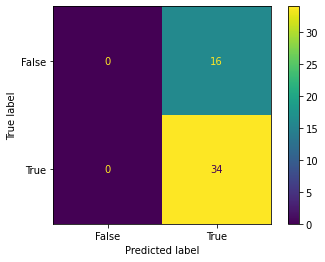

---------------------------
Results of confusion matrix
---------------------------
TP = 34
FN = 16
TPR = 68.0
---------------------------
Mean Error =  0.32
---------------------------
Mean Accuracy =  0.68
---------------------------
Execution time =  0.636
---------------------------
-----Sample 2------------
Confusion Matrix


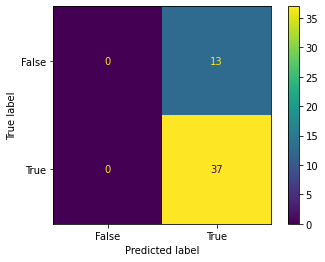

---------------------------
Results of confusion matrix
---------------------------
TP = 37
FN = 13
TPR = 74.0
---------------------------
Mean Error =  0.34
---------------------------
Mean Accuracy =  0.66
---------------------------
Execution time =  0.419
---------------------------
-----Sample 3------------
Confusion Matrix


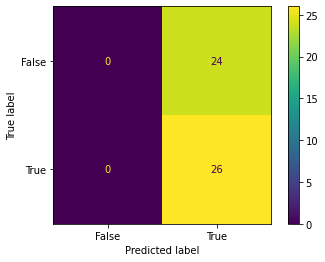

---------------------------
Results of confusion matrix
---------------------------
TP = 26
FN = 24
TPR = 52.0
---------------------------
Mean Error =  0.48
---------------------------
Mean Accuracy =  0.52
---------------------------
Execution time =  0.27
---------------------------
-----Sample 4------------
Confusion Matrix


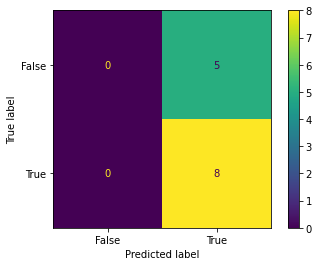

---------------------------
Results of confusion matrix
---------------------------
TP = 8
FN = 5
TPR = 61.538
---------------------------
Mean Error =  0.385
---------------------------
Mean Accuracy =  0.615
---------------------------
Execution time =  0.072
---------------------------


In [ ]:
# Here, the extraction, thresholding and results functions can be run
# Comment in the plotting functions within the thresholding function to visualise the results

# 1- Extraction 
# 1-a) Sort JSON file based on the number of apples
images1apple = sortingGroundTruth(images_data1, ground_truth, numberapple_1)
images2apple = sortingGroundTruth(images_data2, ground_truth, numberapple_2)
images3apple = sortingGroundTruth(images_data3, ground_truth, numberapple_3)
images4apple = sortingGroundTruth(images_data4, ground_truth, numberapple_4)

# 1-b) Split ground truths in different groups to test performance of the 
# proposed algorithm on different groups. Save these groups in arrays
test_1apple = testSorting(images1apple, group_desired)
test_2apple = testSorting(images2apple, group_desired)
test_3apple = testSorting(images3apple, group_desired)
test_4apple = testSorting(images4apple, group_desired)

# 2 - Thresholding
detected1apple = resultsArray(fileDir1, test_1apple, images1apple)
detected2apple = resultsArray(fileDir2, test_2apple, images2apple)
detected3apple = resultsArray(fileDir3, test_3apple, images3apple)
detected4apple = resultsArray(fileDir4, test_4apple, images4apple)

# 3- Results
# For get the results for a specific folder, i.e. with the desired number of
# apples, uncomment one of the following lines
experimentResults(detected1apple, test_1apple, numberapple_1)
#experimentResults(detected2apple, test_2apple, numberapple_2)
#experimentResults(detected3apple, test_3apple, numberapple_3)
#experimentResults(detected4apple, test_4apple, numberapple_4)

In [ ]:
'''
#Here, the extraction and thresholding functions can be run
#Comment in the plotting functions within the thresholding function to visualise the results

for i in range (1,5):
  t0=time.time()
  print('Number of apples to predict: ' + str(i))
  actualapples,images,path,count=ground_truth(i,'/content/drive/MyDrive/ground_truth.json')
  accuracy,error=threshold_count(actualapples,images,path)
  t1=time.time()
  print('Time to execute: ' +str(t1-t0) + 's\n')
'''

Number of apples to predict: 1


FileNotFoundError: ignored